In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
df = pd.read_excel(r'/content/India_Exchange_Rate_Dataset.xls', parse_dates = True)
df["month"] = df["observation_date"].dt.strftime("%b")
df['year'] = [d.year for d in df.observation_date]
years = df['year'].unique()


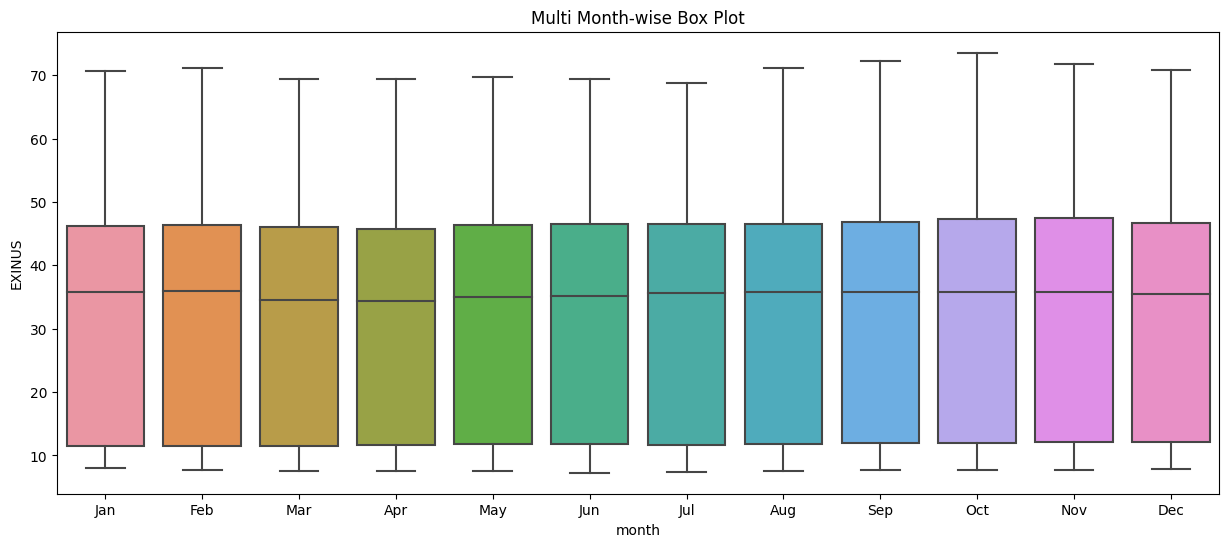

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(x="month", y='EXINUS', data=df).set_title("Multi Month-wise Box Plot")
plt.show()

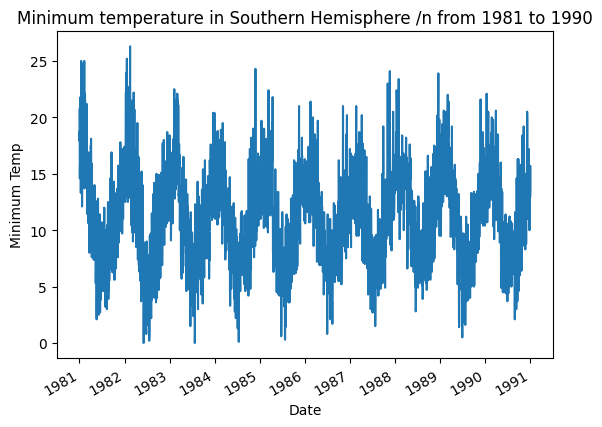

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

series = pd.read_csv('/content/daily-min-temperatures.csv', header=0, index_col = 0, parse_dates = True, squeeze=True)
series.plot()
plt.ylabel("Minimum Temp")
plt.title("Minimum temperature in Southern Hemisphere /n from 1981 to 1990")
plt.show()

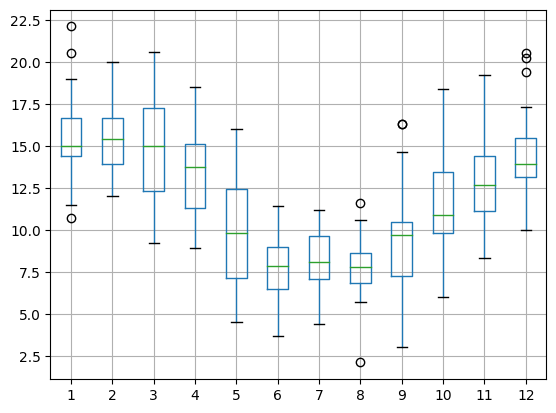

In [ ]:
months = pd.DataFrame()
one_year = series['1990']
groups = one_year.groupby(pd.Grouper(freq='M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months = pd.DataFrame(months)
months.columns = range(1, 13)
months.boxplot()
plt.show()

In [ ]:
from pandas.plotting import autocorrelation_plot
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv('/content/FB.csv', index_col = 0, parse_dates = True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-08,76.180000,77.250000,75.400002,76.519997,76.519997,25733900
2014-12-09,75.199997,76.930000,74.779999,76.839996,76.839996,25358600
2014-12-10,76.650002,77.550003,76.070000,76.180000,76.180000,32210500
2014-12-11,76.519997,78.519997,76.480003,77.730003,77.730003,33462100
2014-12-12,77.160004,78.879997,77.019997,77.830002,77.830002,28091600


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

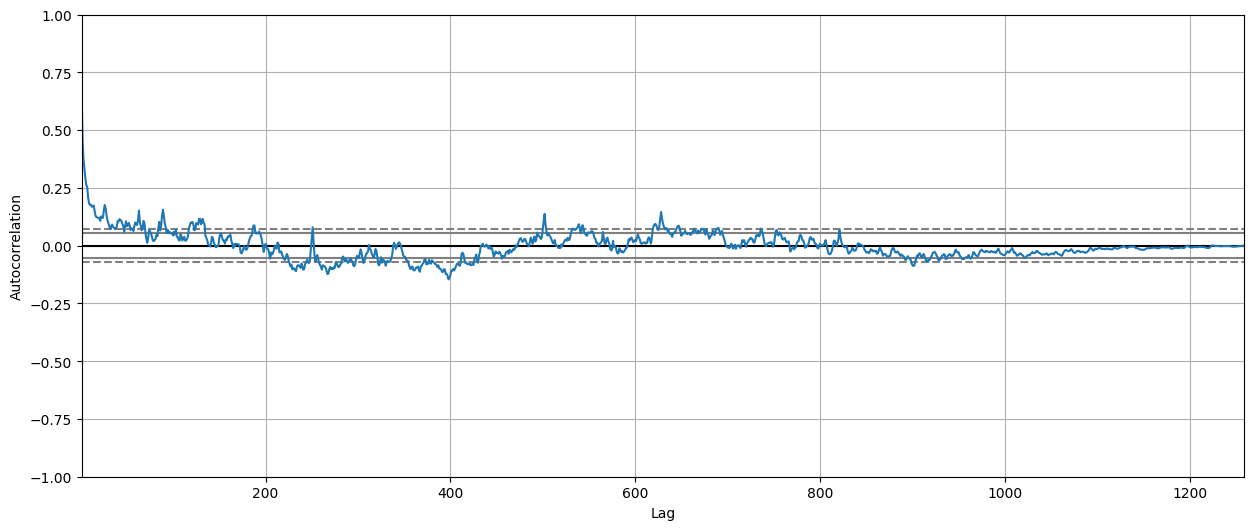

In [ ]:
plt.rcParams.update({'figure.figsize':(15, 6)})
autocorrelation_plot(df.Volume.tolist())

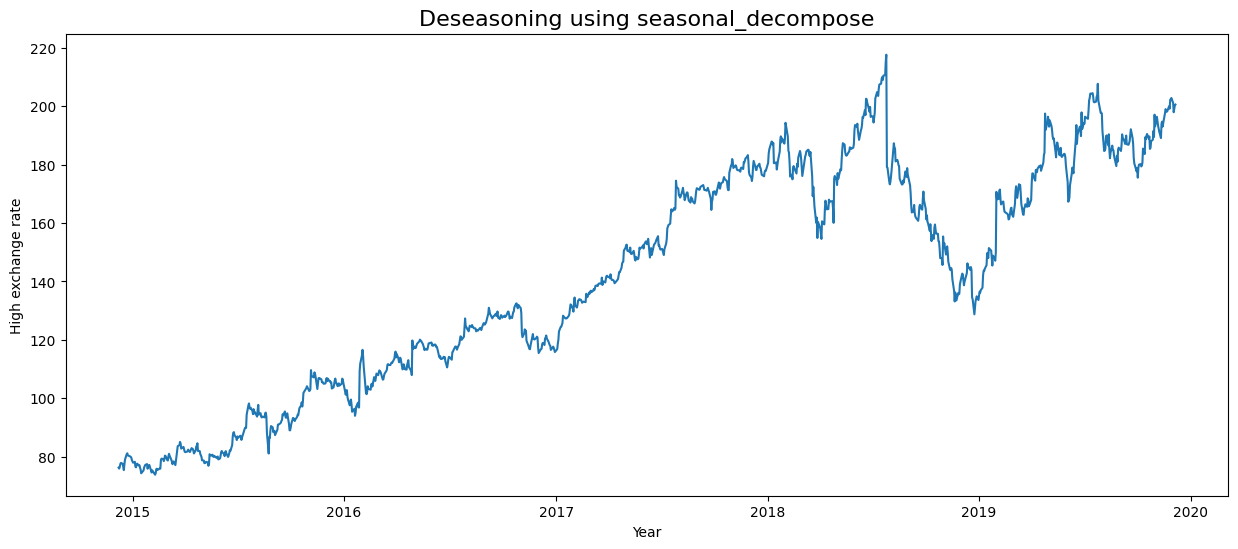

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv(r'/content/FB.csv', parse_dates = True, index_col=0)
result_mul = seasonal_decompose(df['High'], model='multiplicative', period=2)
deseason = df['High'] - result_mul.seasonal
plt.figure(figsize=(15,6))
plt.plot(deseason)
plt.title('Deseasoning using seasonal_decompose', fontsize=16)
plt.xlabel('Year')
plt.ylabel('High exchange rate')
plt.show()


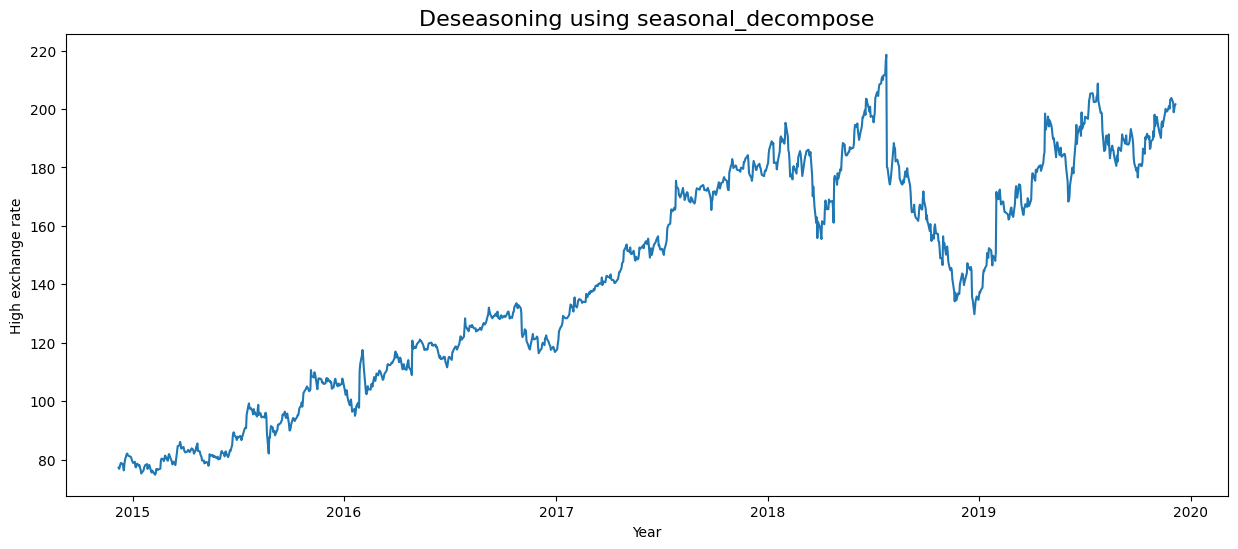

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv(r'/content/FB.csv', parse_dates = True, index_col=0)
result_mul = seasonal_decompose(df['High'], model='additive', period=2)
deseason = df['High'] - result_mul.seasonal
plt.figure(figsize=(15,6))
plt.plot(deseason)
plt.title('Deseasoning using seasonal_decompose', fontsize=16)
plt.xlabel('Year')
plt.ylabel('High exchange rate')
plt.show()


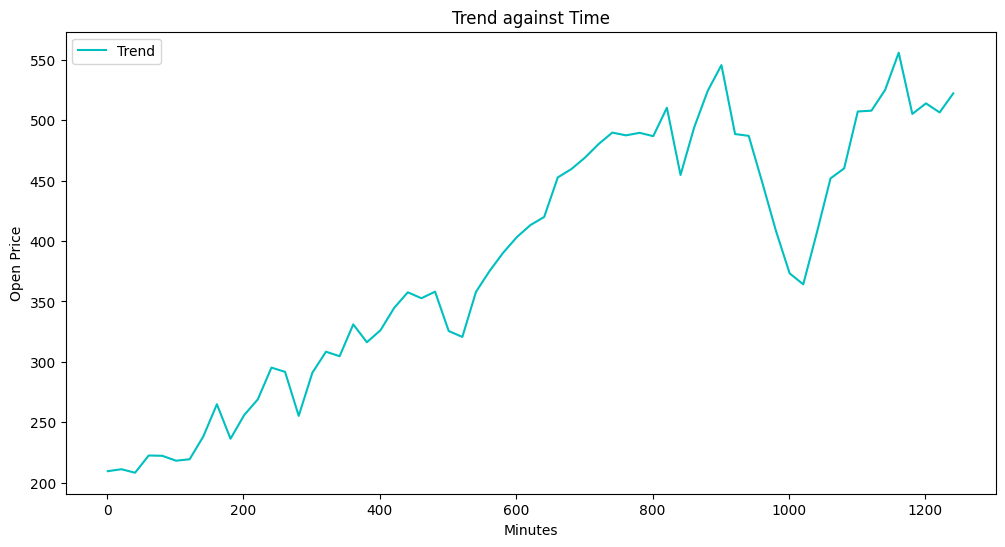

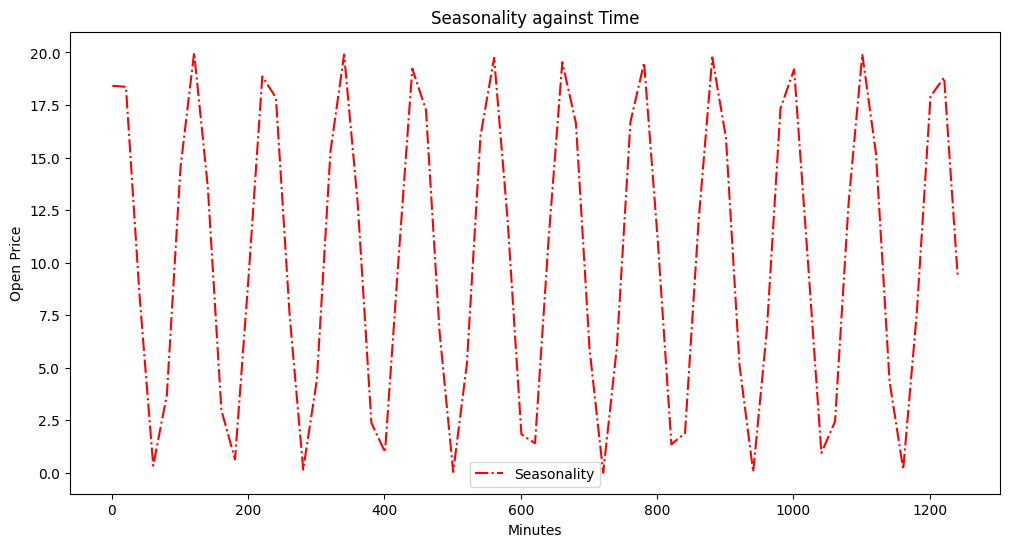

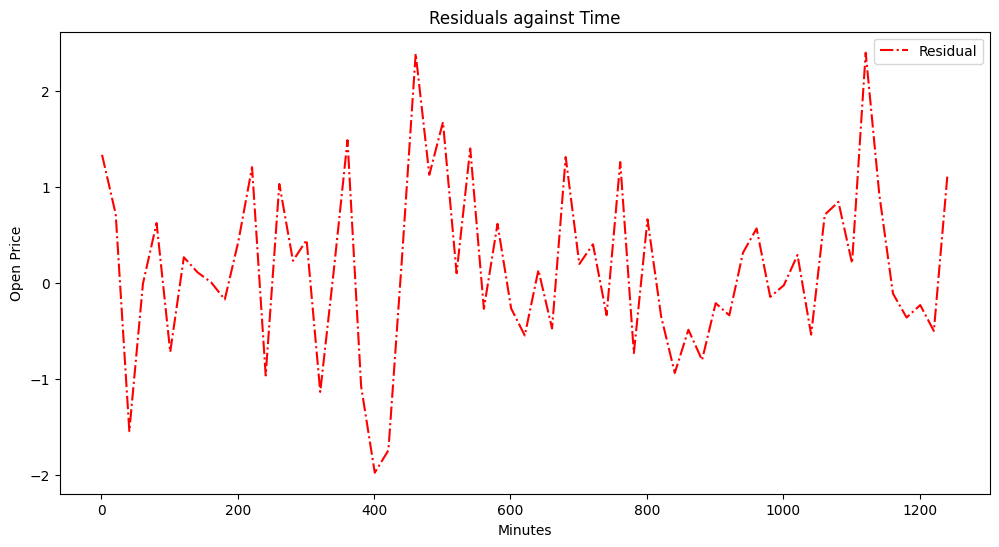

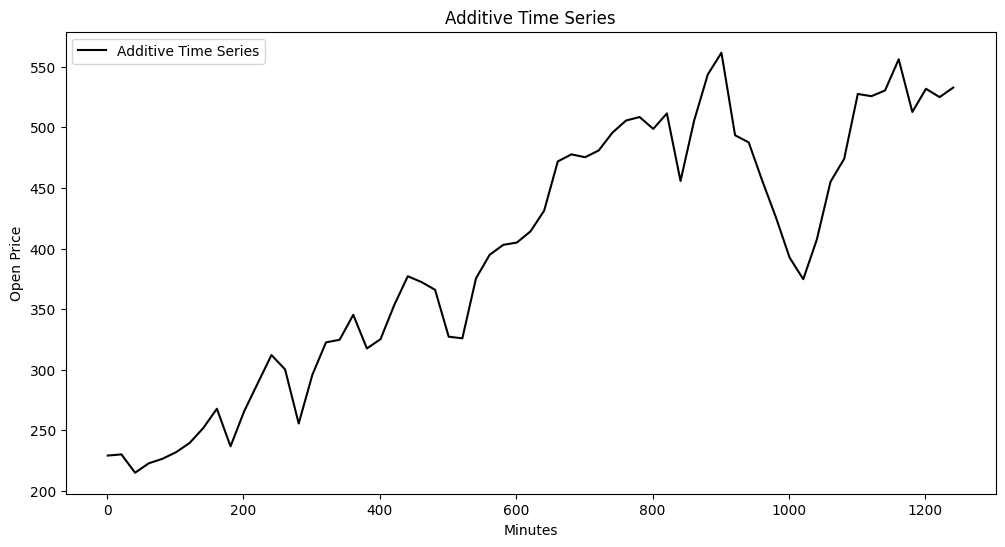

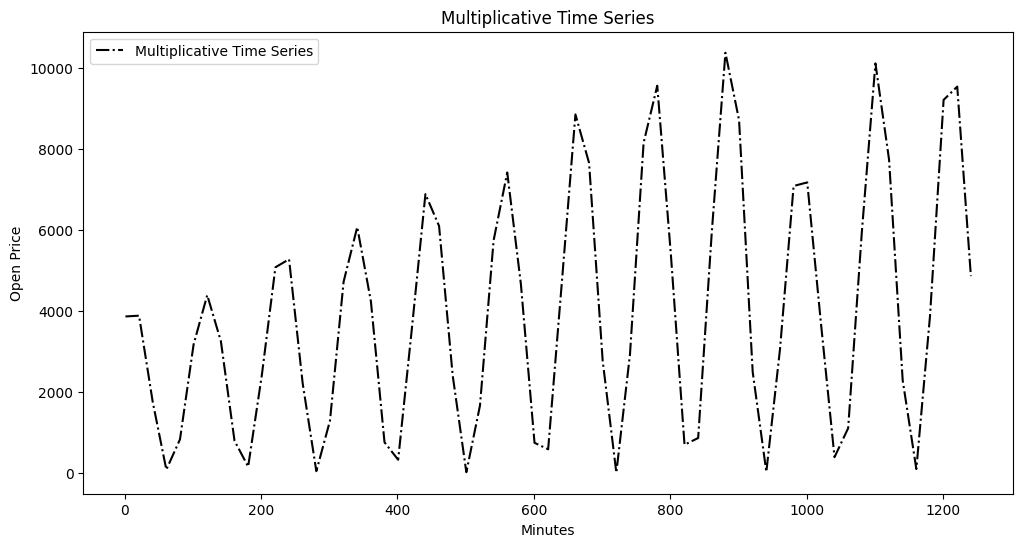

In [20]:
#Decomposition from scratch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/content/FB.csv')

T_Series = np.arange(1, len(df) + 1)
Trend = df['Open'] * 2.75

subsample_factor = 20
T_Series = T_Series[::subsample_factor]
Trend = Trend[::subsample_factor]

plt.figure(figsize=(12, 6))

plt.plot(T_Series, Trend, 'c-', label="Trend")
plt.title("Trend against Time")
plt.xlabel("Minutes")
plt.ylabel("Open Price")
plt.legend()
plt.show()

seasonal_pattern = np.sin(T_Series) * 10
seasonality = 10 + seasonal_pattern

plt.figure(figsize=(12, 6))

plt.plot(T_Series, seasonality, 'r-.', label="Seasonality")
plt.title("Seasonality against Time")
plt.xlabel("Minutes")
plt.ylabel("Open Price")
plt.legend()
plt.show()

np.random.seed(10)
residual = np.random.normal(loc=0.0, scale=1, size=len(T_Series))

plt.figure(figsize=(12, 6))

plt.plot(T_Series, residual, 'r-.', label="Residual")
plt.title("Residuals against Time")
plt.xlabel("Minutes")
plt.ylabel("Open Price")
plt.legend()
plt.show()

additive_Tmodel = Trend + seasonality + residual

plt.figure(figsize=(12, 6))

plt.plot(T_Series, additive_Tmodel, 'k-', label="Additive Time Series")
plt.title("Additive Time Series")
plt.xlabel("Minutes")
plt.ylabel("Open Price")
plt.legend()
plt.show()

ignored_residual = np.ones_like(residual)
multiplicative_Tmodel = Trend * seasonality * ignored_residual

plt.figure(figsize=(12, 6))

plt.plot(T_Series, multiplicative_Tmodel, 'k-.', label="Multiplicative Time Series")
plt.title("Multiplicative Time Series")
plt.xlabel("Minutes")
plt.ylabel("Open Price")
plt.legend()
plt.show()


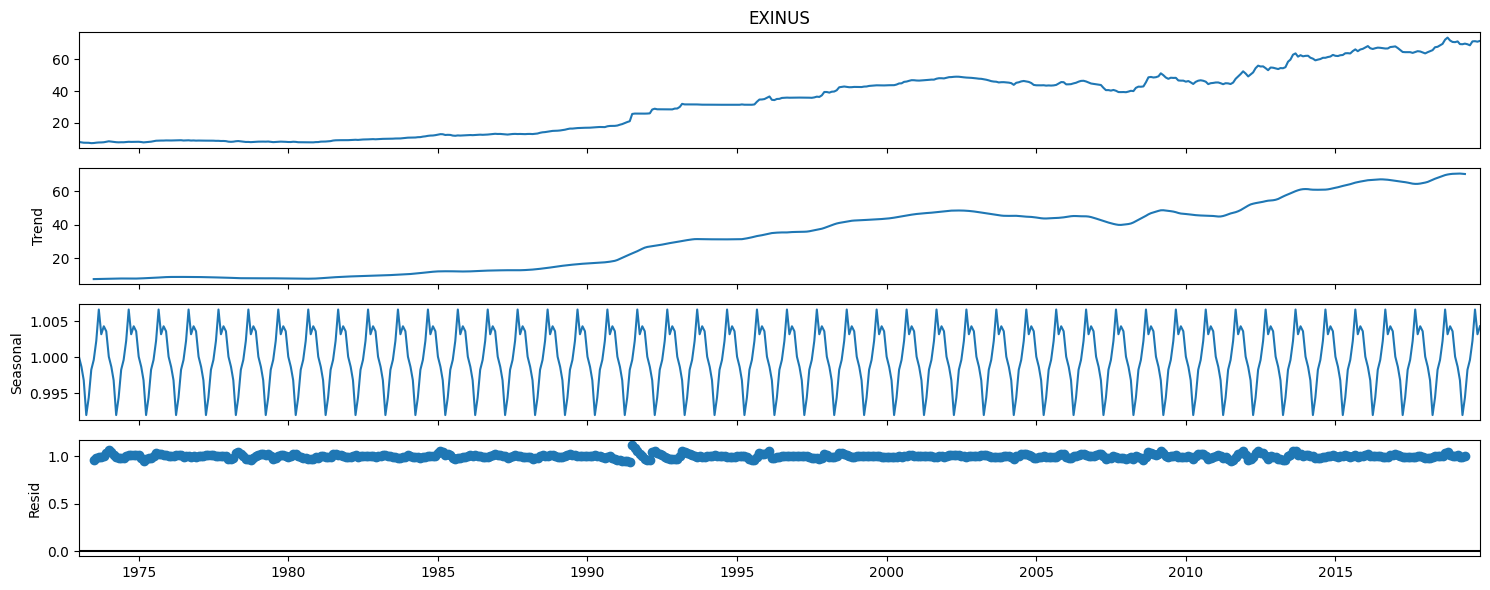

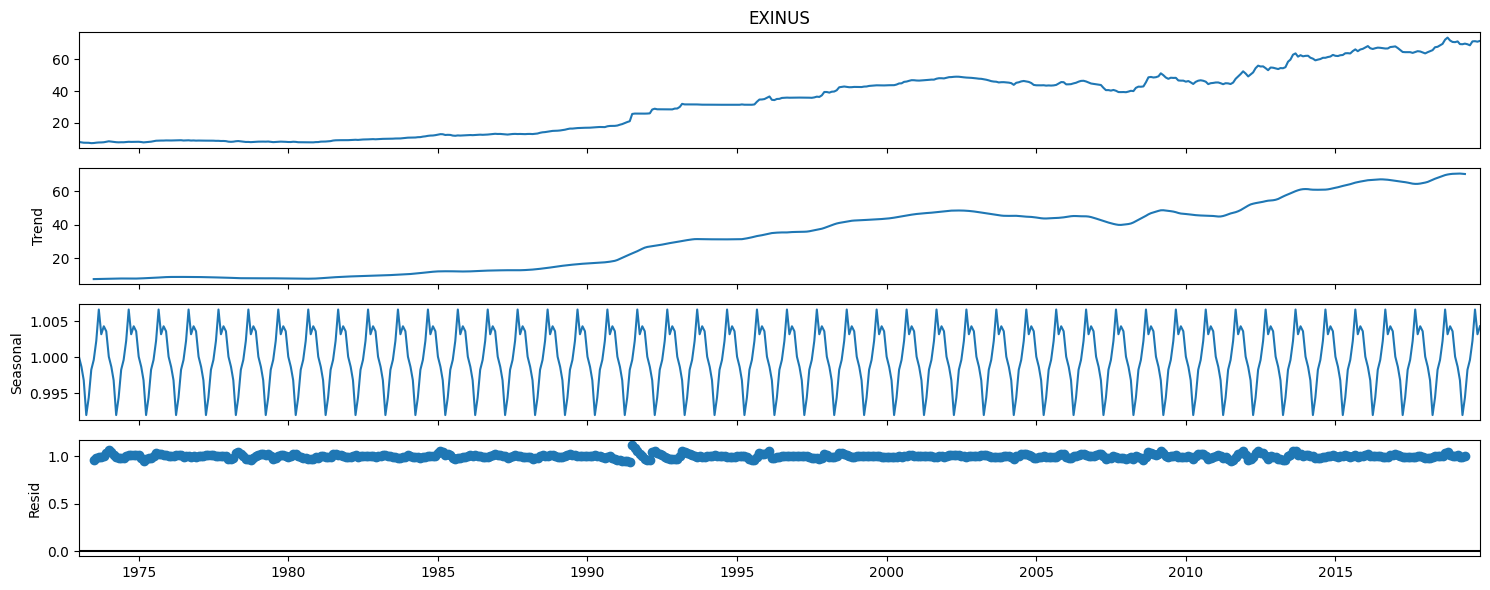

In [ ]:
df1 = pd.read_excel(r'/content/India_Exchange_Rate_Dataset.xls', parse_dates = True, index_col=0)
result = seasonal_decompose(df1['EXINUS'], model='multiplicative')
result.plot()